<a href="https://colab.research.google.com/github/BhaskarMendhe358/Email-Campaign-Effectiveness-Prediction/blob/main/Individual_Notebook_Capstone_Project_3_Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Email Campaign Effectiveness Prediction </u></b>

## <b> Problem Description </b>

### Most of the small to medium business owners are making effective use of Gmail-based Email Marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail that is ignored ; read ; acknowledged by the reader.

## **Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Necessary Libraries**

In [ ]:
# Importing Necessary Libraries.

# For Data Reading and Manipulation -- pandas and numpy.
import pandas as pd
import numpy as np

# For Data Visualization -- matplotlib.pyplot and seaborn.
import matplotlib.pyplot as plt
import seaborn as sns

# For checking multicollinearity -- variance_inflation_factor.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Data Preprocessing.
## To transform numerical features -- PowerTransformer.
from sklearn.preprocessing import PowerTransformer
## To normalize numerical features -- MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
## To transform categorical Features -- OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder
## To impute missing numerical values -- IterativeImputer.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
## To impute missing categorical values -- SimpleImputer.
from sklearn.impute import SimpleImputer

# Data Splitting -- train_test_split.
from sklearn.model_selection import train_test_split

# HyperParameter tuning -- GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Models -- Linear and Non Linear.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Feature Engineering -- adding polynomials using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# PrettyTable - Tabular  representation of results.
from prettytable import PrettyTable,ALL

# Metrics for checking performance -- precision,recall,f1 and roc_auc scores.
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score

# To neglect warnings -- warnings.
import warnings
warnings.filterwarnings("ignore")

## **Reading the Data**

In [ ]:
# Importing the dataset.
ec = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Email_Campaign/data_email_campaign.csv")

In [ ]:
# Checking dataset information.
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
# Checking the content in the dataset.
ec.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


**Inference** : 

*   There are total 12 features out of which the feature "Email_Status " is a response variable and rest are predictor variables.
*   As we can see, the features "Email_Type", "Email_Source_Type",  "Email_Campaign_Type" and "Time_Email_sent_Category" contains categorical values but these features mapped to wrong data type, so surely we have to look upon this.
*   The "Email_ID" feature contains identity information so we can drop this feature for further procedures.


In [ ]:
# Checking null values.
ec.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

**Inference** : The features "Customer_Location", "Total_Past_Communications", "Total_Links" and "Total_Images" have missing values. We need to take care of these missing values.

In [ ]:
# Checking duplicate rows in the dataset.
ec.duplicated().sum()

0

**Inference** : There are no duplicate rows in the dataset.

In [ ]:
# Let's create a copy of the original dataset so that changes don't reflect in that.
data=ec.copy()

## <b> Data Description </b>

### <b> The dataset contains information related to emails like total number of past communications between business owners and their customers, total links attached etc. </b>


### <b>Attribute Information: </b>


*   **Email_ID** - Email ids of the customers.
*   **Email_type** - There are 2 categories 1 and 2. We can think of them as marketing email or important updates,notices like emails regarding the business.
*   **Subject_Hotness_Score** - Emails subject scores on the basis of how good and effective the content is.
*   **Email_Source** - Represents the source of the email like sales,marketing or product type email.
*   **Email_Campaign_Type** - The campaign type of the emails.
*   **Total_Past_Communications** - The number of previous mails from the same source, the number of communications had.
*   **Customer_Location** - Contains demographical data of the customers, the location where the customer resides.
*   **Time_Email_sent_Category** - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slots.
*   **Word_Count** - The number of words contained in the mail.
*   **Total_Links** - The number of links in the email.
*   **Total_Images** - The number of images in the email.
*   **Email_Status** - The target variable which contains whether the mail was is ignored; read; acknowledged by the reader.

## **Exploratory Data Analysis**

### **Response Variable**

**The response variable is "Email_Status".**

In [ ]:
# Checking distribution of classes in response vaiable.
data['Email_Status'].value_counts().sort_index()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

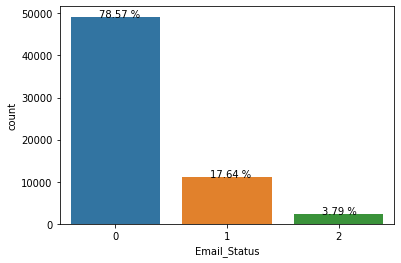

In [ ]:
# Using countplot fo visualization.
ax=sns.countplot(data['Email_Status'])
# Marking height percent of each bar at top.
for p in ax.patches:
  ## Fetching height.
  height=p.get_height()
  ## Converting to percent for better understanding.
  height_percent=str(round(height/len(data['Email_Status'])*100,2)) + ' %'
  ## Marking height.
  ax.annotate(height_percent,(p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Inference** : There is high imbalance in class distribution of response variable. The majority of the data, 54941 data points which is 80.38 % belongs to "class 0", 11039 points which is 16.15 % belongs to class "1" and very small amount of data, 2373 data points which is 3.47% belongs to "class 2". We need to take care of this class imbalancy.

### **Predictor Variables**

In [ ]:
# Checking features "Email_Type", "Email_Source_Type", "Email_Campaign_Type" and "Time_Email_sent_Category".
print(data['Email_Type'].value_counts().sort_index())
print('='*30)
print(data['Email_Source_Type'].value_counts().sort_index())
print('='*30)
print(data['Email_Campaign_Type'].value_counts().sort_index())
print('='*30)
print(data['Time_Email_sent_Category'].value_counts().sort_index())

1    48866
2    19487
Name: Email_Type, dtype: int64
1    37149
2    31204
Name: Email_Source_Type, dtype: int64
1      736
2    48273
3    19344
Name: Email_Campaign_Type, dtype: int64
1    13636
2    41129
3    13588
Name: Time_Email_sent_Category, dtype: int64


**Inference** : We can see that the features "Email_Type", "Email_Source_Type", "Email_Campaign_Type" and "Time_Email_sent_Category" contains categorical information , so we will change the datatype according to that.

In [ ]:
# Mapping the correct datatype of the features "Email_Type", "Email_Source_Type", "Email_Campaign_Type" and "Time_Email_sent_Category".

features_dtype_to_be_changed=["Email_Type","Email_Source_Type","Email_Campaign_Type","Time_Email_sent_Category"]

for feature in features_dtype_to_be_changed:
  data[feature]=data[feature].astype('object')

**Now all the independent features are ready for exploration. Let's explore them.**

**Let's Check Numerical Features**

In [ ]:
# Collecting numerical features.
total_numerical_features=list(data.describe().columns)
print(total_numerical_features)

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']


**Inference** : The "Email_Status" feature is a response variable so we need to neglect it while exploring numerical predictor variables.

In [ ]:
# Collecting predictor numerical variables.
numerical_features=[feature for feature in total_numerical_features if feature != "Email_Status"]
print(numerical_features)
print('='*100)
print('Total Numerical Features :',len(numerical_features))

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']
Total Numerical Features : 5


In [ ]:
# Checking descriptive information.
data[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0


**Inference** : For the features "Total_Past_Communications" and "Word_Count" min and max lies under the range of "mean + 3* std. deviation" and for the rest max value fall out of this range.

**Visualizing Numerical Features**

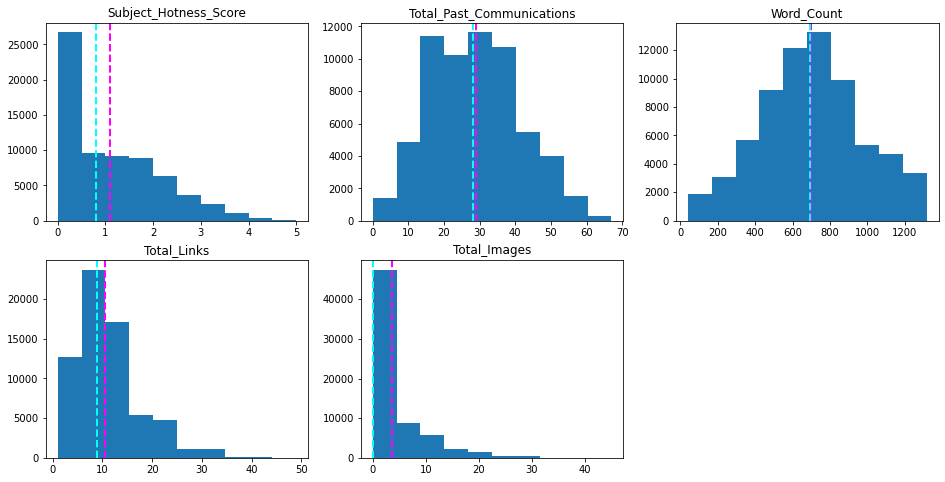

In [ ]:
# Using Histogram for the features.
n=1
plt.figure(figsize=(16,8))
for col in numerical_features:
  feature=data[col]
  # Using Subplots.
  plt.subplot(2,3,n)
  plt.hist(feature)
  # Marking mean and median line in the plot.
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  # Setting title.    
  plt.title(col)
  n+=1
plt.show()

**Inference** : 

*   The mean and median for all the features except 'Word_Count' differs so surely these features contains outliers.
*   The features 'Total_Past_Communications' and 'Word_Count' are distributed with good variance.



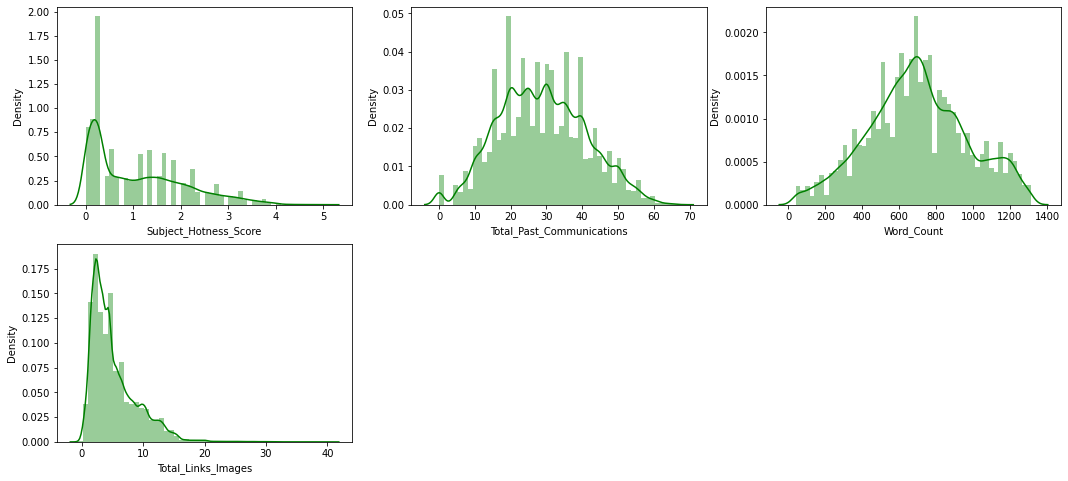

In [ ]:
# Using Distribution plots
n=1
plt.figure(figsize=(18,8))
for col in numerical_features:
  feature = data[col]
  # Using subplots.
  plt.subplot(2,3,n)
  sns.distplot(feature, color = 'green')
  n+=1
plt.show()

**Inference** : The features 'Subject_Hotness_Score','Total_Links' and  'Total_Images' are postively skewed.

**Let's try to remove skewness from skewed features.**

In [ ]:
# Collecting Skewed features.
skewed_features=['Subject_Hotness_Score','Total_Links','Total_Images']

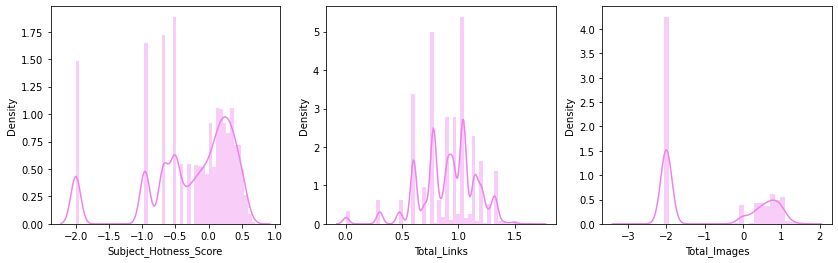

In [ ]:
# Taking Log Transformation.
n=1
plt.figure(figsize=(14,4))
for col in skewed_features:
  feature = np.log10(data[col]+0.01)
  # Using subplots.
  plt.subplot(1,3,n)
  sns.distplot(feature, color = 'violet')
  n+=1
plt.show()

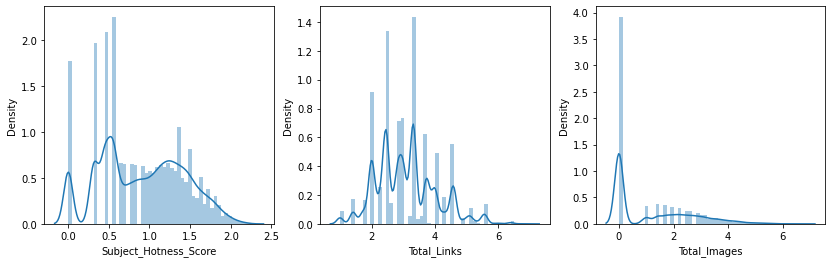

In [ ]:
# Taking Square Root Transformation.
n=1
plt.figure(figsize=(14,4))
for col in skewed_features:
  feature = np.sqrt(data[col])
  # Using subplots.
  plt.subplot(1,3,n)
  sns.distplot(feature)
  n+=1
plt.show()

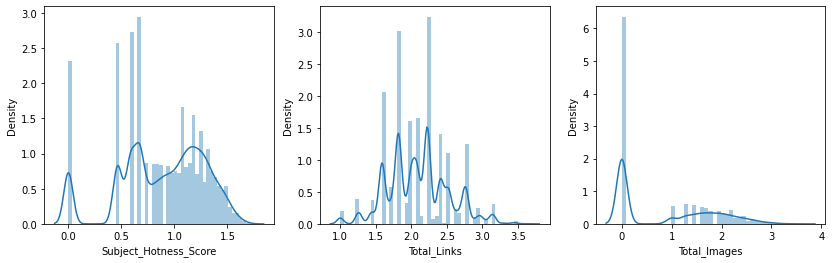

In [ ]:
# Taking Cube Root Transformation.
n=1
plt.figure(figsize=(14,4))
for col in skewed_features:
  feature = np.cbrt(data[col])
  # Using subplots.
  plt.subplot(1,3,n)
  sns.distplot(feature)
  n+=1
plt.show()

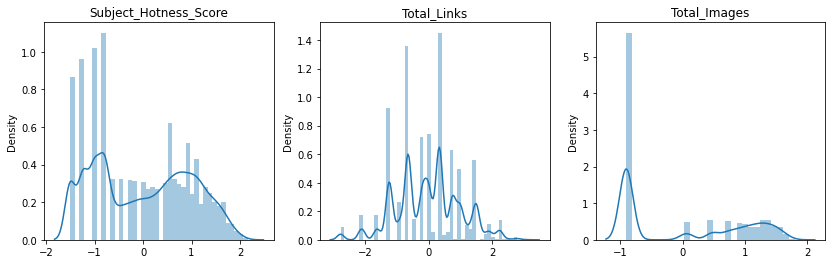

In [ ]:
# Using Power Transformation.
n=1
plt.figure(figsize=(14,4))
for col in skewed_features:
  pt = PowerTransformer(method='yeo-johnson',standardize=True)
  # Reshaping the feature to 2d array so that transformation can happen easily.
  feature = pt.fit_transform(np.array(data[col]).reshape(-1,1))
  # Using subplots.
  plt.subplot(1,3,n)
  sns.distplot(feature).set_title(col)
  n+=1
plt.show()

**Inference** : The Log, Square Root and Cube Root transformations used are able to remove the skewness , but Power transformation removed skewness outstandigly and also it standardize the data as well. Hence, we will use power transformation for the all numerical features which are skewed and non-skewed as it removes the skewness and standardize the features as well.

**Let's Check for Outliers.**

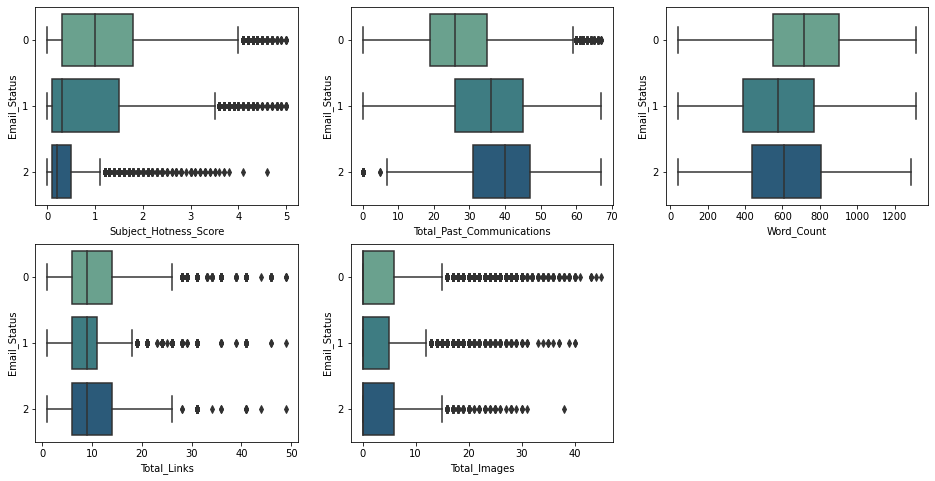

In [ ]:
# Checking for Outliers using Box Plots.
# Plotting Boxplot of each feature against response variable.
n=1
## Setting figuresize.
plt.figure(figsize=(16,8))
for col in numerical_features:
  feature = data[col]
  # Using subplots.
  plt.subplot(2,3,n)
  sns.boxplot(y=data['Email_Status'].astype('category'),x=feature,palette="crest")
  n+=1
plt.show()

**Inference** : All the numerical features except 'Word_Count' contains outliers. So we need to take care of these outliers.

**Let's Check Correlation among Numerical Features.**

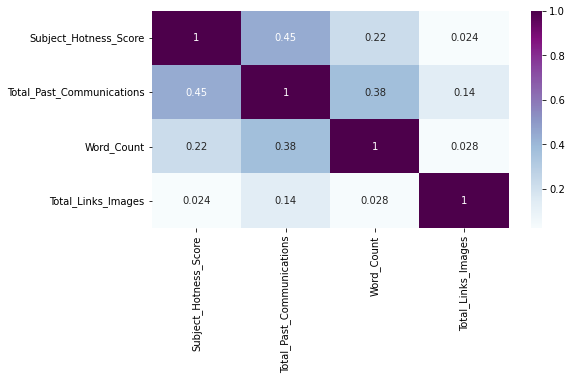

In [ ]:
# Using heatmap for visualization.
## Setting figursize.
plt.figure(figsize=(8,4))
## Calculating correlation among numerical features.
correlation = data[numerical_features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')
plt.show()

**Inference** : The features "Total_Images" and "Total_Links" are highly correlated with correlation value as 0.78.

In [ ]:
# Multicollinearity
# Let's check VIF values.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # removing missing values before calculating VIF values to not get error.
  X=X.dropna()
  # Calculating VIF
  vif = pd.DataFrame()
  vif["Variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
# VIF values for numerical features.
calc_vif(data[numerical_features])

,Variables,VIF
0,Subject_Hotness_Score,1.812747
1,Total_Past_Communications,3.764936
2,Word_Count,3.992614
3,Total_Links,9.525929
4,Total_Images,3.574892


**Inference** : The "Total_Links" feature have high VIF value.

Let's calculate VIF values without "Total_Links" feature.

In [ ]:
# VIF values after removing "Total_Links" feature.
calc_vif(data[['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Images']])

,Variables,VIF
0,Subject_Hotness_Score,1.694566
1,Total_Past_Communications,2.958079
2,Word_Count,3.347659
3,Total_Images,1.421444


**Inference** : The VIF values get reduced. So we should either drop "Total_Links" feature or use a combination of the features "Total_Links" and "Total_Images".

**Let's Check Categorical Features**

In [ ]:
# Categorical features 
total_categorical_features = list(data.describe(include=['object']).columns)
print(total_categorical_features)

['Email_ID', 'Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']


The 'Email_ID' feature contains identity information, so we can skip this feature for further process.

In [ ]:
# Categorical features to be used.
categorical_features = total_categorical_features[1:]
print(categorical_features)
print('='*100)
print("Total Categorical Features :",len(categorical_features))

['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']
Total Categorical Features : 5


In [ ]:
# Checking Information of Categorical Features.
data.describe(include=['object']).transpose()[1:]

,count,unique,top,freq
Email_Type,68353,2,1,48866
Email_Source_Type,68353,2,1,37149
Customer_Location,56758,7,G,23173
Email_Campaign_Type,68353,3,2,48273
Time_Email_sent_Category,68353,3,2,41129


**Inference** : There are two subcategories under "Email_Type" and "Email_Source_Type" features, three subcategories under "Email_Campaign_Type" and "Time_Email_Sent_Category" features, and seven subcategories under "Customer_Location" feature.

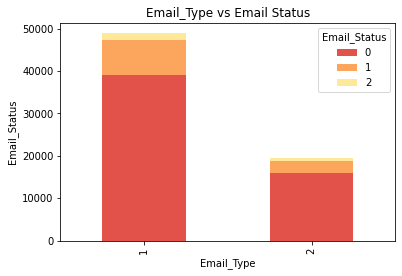

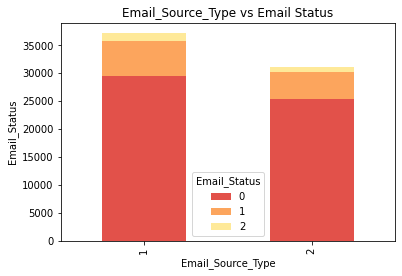

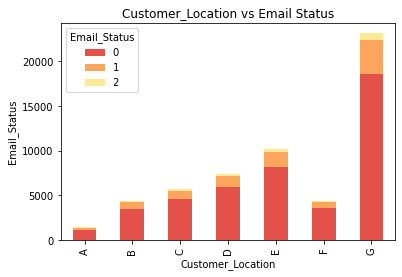

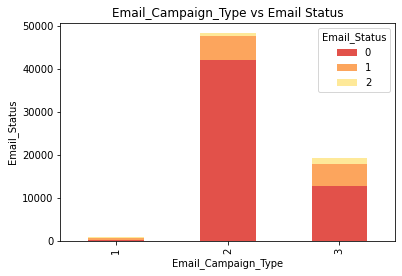

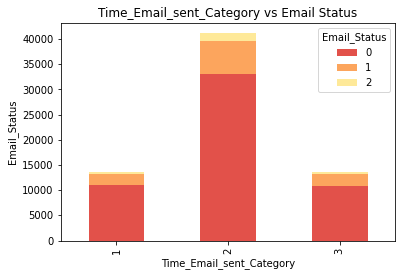

In [ ]:
# Checking distribution of categorical features with respect to response variable.
## Choosing different colors for plot.
color=sns.palettes.color_palette('Spectral')
for column in categorical_features:
  feature=data.groupby([str(column),'Email_Status'])[column].count().unstack()
  fig=feature.plot(kind='bar',stacked=True,title=column+' vs Email Status',color=color)
  fig.set_ylabel('Email_Status')
  plt.show()

**Inference** : The distribution of Email_Status is similar in all categorical features except "Email_campaign_Type".There are more number of points related to majority class in each feature.For "Email_campaign_Type" as Type 1 ,the distribution of points w.r.t to classes can be seen similar, as there are very less number of points for the same.

## **Data Preparation before Modelling**

In [ ]:
# The "Email_Id" feature contains identity information. So dropping this feature.
data.drop('Email_ID',axis=1,inplace=True)

**Removing Outliers**

As there is high class imbalancy and we have very few points of class "2" and class "1" , so we will remove only those outliers which belongs to class "1".

In [ ]:
# Removing points which fall out off the inter quartile range for each feature.
for feature in numerical_features:
  ## Calculating 25 and 75 percentile.
  q_25,q_75=np.percentile(data[~data[feature].isnull()].loc[data['Email_Status']==0,feature],[25,75])
  ## Calculating inter quartile range.
  iqr=q_75-q_25
  ## Calculating upper limit.
  upper=q_75+1.5*iqr
  ## Calculating lower limit.
  lower=q_25-1.5*iqr
  ## Dropping all those points which fall above upper limit and below lower limit.
  data.drop(data[(data['Email_Status']==0) & (data[feature]>=upper)].index,axis=0,inplace=True)
  data.drop(data[(data['Email_Status']==0) & (data[feature]<=lower)].index,axis=0,inplace=True)

**Replacing Missing Values**

We are using Iterative Imputer to fill missing values of numerical features and treating missing values of categorical feature as seperate category using Simple Imputer.

In [ ]:
## Using Iterative Imputer for Numerical Features.
num_imputer=IterativeImputer(random_state=0)
data[numerical_features]=num_imputer.fit_transform(data[numerical_features])

## Treating missing values as seperate category for Categorical Features.
cat_imputer=SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='Missing')
data['Customer_Location']=cat_imputer.fit_transform(np.array(data['Customer_Location']).reshape(-1,1))

In [ ]:
# Cross Checking that missing values got replaced or not.
data.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

**Removing Collineaity** : To remove collinearity combination of collinear features as a single feature have been taken.

In [ ]:
## Using combination of collinear features to remove collinearity.
data['Total_Links_Images']=0.4*data['Total_Links']+0.6*data['Total_Images']

**Splitting Dataset into Train and Test Set**

In [ ]:
# Collecting response and predictor variables.
y=np.array(data['Email_Status']).reshape(-1,1)
X=data.drop(['Email_Status','Total_Links','Total_Images'],axis=1)

In [ ]:
# Splitting dataset into train and test set.
train_set,test_set,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

**Transforming Numerical Features**

In [ ]:
# Collecting Numerical Features.
numerical_features=list(X.describe().columns)
print(numerical_features)
print('='*100)
print('Total numerical Features :',len(numerical_features))

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links_Images']
Total numerical Features : 4


In [ ]:
# Using Power Transformer as we have seen ealier that it helps in removing the skewness and standardizing as well.
transformer=PowerTransformer(standardize=True)
## Fitting the transformer with numerical features in train set.
transformer.fit(train_set[numerical_features])
## Transforming numerical features in train set.
train_numerical=transformer.transform(train_set[numerical_features])
## Transforming numerical features in test set.
test_numerical=transformer.transform(test_set[numerical_features])

In [ ]:
print('Numerical Train Set Shape :',train_numerical.shape)
print('Numerical Test Set Shape :',test_numerical.shape)

Numerical Train Set Shape : (50075, 4)
Numerical Test Set Shape : (12519, 4)


**Transforming Categorical Features**

In [ ]:
# Collecting Categorical Features.
print(categorical_features)
print('='*110)
print('Total numerical Features :',len(categorical_features))


['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']
Total numerical Features : 5


In [ ]:
# Transfoming Categorical Features which are nominal in nature. 
ohe=OneHotEncoder(sparse=False)
## Fitting the encoder with categorical features in train set.
ohe.fit(train_set[categorical_features])
## Transforming categorical features in train set.
train_categorical=ohe.transform(train_set[categorical_features])
## Transforming categorical features in test set.
test_categorical=ohe.transform(test_set[categorical_features])

In [ ]:
print('Categorical Train Set Shape :',train_categorical.shape)
print('Categorical Test Set Shape :',test_categorical.shape)

Categorical Train Set Shape : (50075, 18)
Categorical Test Set Shape : (12519, 18)


**Concatenating Transformed numerical and categorical features for both train and test set.**

In [ ]:
# Concatecating the numerical and categorical features together.
X_train=np.concatenate([train_numerical,train_categorical],axis=1)
X_test=np.concatenate([test_numerical,test_categorical],axis=1)

In [ ]:
print('Train Set Shape :',X_train.shape)
print('Test Set Shape :',X_test.shape)

Train Set Shape : (50075, 22)
Test Set Shape : (12519, 22)


## **Handling Class Imbalancy**



*   There is high class imbalancy in the dataset. To solve this we will provide different weights to both the majority and minority classes. The difference in weights will influence the classification of the classes during the training phase. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class.
*   The weights can be assigned accoding to classes simply by using parameter "class_weight" as "balanced" while defining the machine learning models.



## **Metrics to be used**

There is high imbalance of classes in the dataset, and also our objective is to classify the mails as ignored ; read and acknowledged as correctly as possible to corresponding classes.So fo this task we will look upon weighted Precison,Recall and F1 score, as Precision and Recall account for true positives which is nothing but correctly classified points belonging to respective classes and F1 score is just hamonic mean of these two which is a combined single metric to look for. We wil also look for ROC_AUC score. In final we look upon below metics.


*   Precison Score
*   Recall Score
*   F1 Score
*   ROC AUC Score



## **Model Explainabilty and Feature Importance**


*   The objective is to classify the mails as ignored ; read and acknowledged. For this , we need to find the reasons why the mails being ignored , how many being read and finally how many being acknowledged.So wee need a model which an explain the reasons fo classifications , so that we can improve the content for the mails such that mails could get read and acknowledged in the future which helps the owners stay connected with their prospective customers.
*   The feature importance is also very important in this case as we need to know which are the most important features for classification, so we can focus on those to improve the content for mails.



## **Modelling**

In [ ]:
# Function for hyperparameter tuning which returns best params for the classifier.
def model_best_params(classifier,parameters,X_train,y_train):
  # Using GridSearch CV.
  gscv=GridSearchCV(classifier, parameters, scoring='recall_weighted',cv=5)
  ## Fitting GridSearchCV.
  gscv.fit(X_train,y_train)
  # returning best params.
  return gscv.best_params_

In [ ]:
# Function which fits the classifier and returns the results -- metrics score.
def model_results(classifier,X_train,y_train,X_test,y_test):
  # Fitting the classifier with train set.
  classifier.fit(X_train,y_train)
  # Collecting Predictions -- Each point belongs to which class type and probabilities of each class for corresponding point.
  ## Test Pedictions.
  y_pred_te=classifier.predict(X_test)
  y_pred_proba_te=classifier.predict_proba(X_test)
  ## Train Predictions.
  y_pred_tr=classifier.predict(X_train)
  y_pred_proba_tr=classifier.predict_proba(X_train)

  # Calculating Metrics Scores.
  ## Test Scores.
  cm=confusion_matrix(y_test,y_pred_te)
  precision_te=precision_score(y_test,y_pred_te,average='weighted')
  recall_te=recall_score(y_test,y_pred_te,average='weighted')
  f1_te=f1_score(y_test,y_pred_te,average='weighted')
  roc_auc_te=roc_auc_score(y_test,y_pred_proba_te,multi_class='ovr',average='weighted')
  ## Train Scores.
  precision_tr=precision_score(y_train,y_pred_tr,average='weighted')
  recall_tr=recall_score(y_train,y_pred_tr,average='weighted')
  f1_tr=f1_score(y_train,y_pred_tr,average='weighted')
  roc_auc_tr=roc_auc_score(y_train,y_pred_proba_tr,multi_class='ovr',average='weighted')

  scoring_dict={'Metrics':['precision score','recall score','f1 score','roc_auc score'],
                'Train Score':[precision_tr,recall_tr,f1_tr,roc_auc_tr],
                'Test Score':[precision_te,recall_te,f1_te,roc_auc_te]}
  # Storing results in dataframe.
  results=pd.DataFrame(scoring_dict)
  ## Plotting Confusion Matrix whenever function would be called.
  ConfusionMatrixDisplay(cm).plot()
  plt.show()

  # returning results.
  return results


### **Logistic Regression**

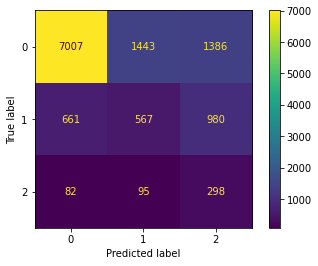

,Metrics,Train Score,Test Score
0,precision score,0.763315,0.762113
1,recall score,0.628617,0.628804
2,f1 score,0.679221,0.679677
3,roc_auc score,0.775551,0.779003


In [ ]:
# Logistic Regression.
lr=LogisticRegression(class_weight='balanced')
# Training and Collecting the results for the classifier.
results=model_results(lr,X_train,y_train,X_test,y_test)
results

**Inference** : 
*   The training and test scores for Logistic Regression don't differ much so the model is not overfitting or underfitting.
*   The Logistic Regression gives test score of precison as 0.762 and roc_auc as 0.779 ,but recall score is low which is 0.628, thus f1 score is low which is 0.679.
*   It is able to correctly classify 7007 points out of 9836 of class 0.
*   It is able to correctly classify 298 points out of 475 of class 2 which is a minority class, but it classified only 567 points out of 2208 of class 1.





In [ ]:
# Hyper parameter tuning.
lr=LogisticRegression(class_weight='balanced')
parameters={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

# Collecting best params for the classifier.
best_params=model_best_params(lr,parameters,X_train,y_train)
print(best_params)

{'C': 100}


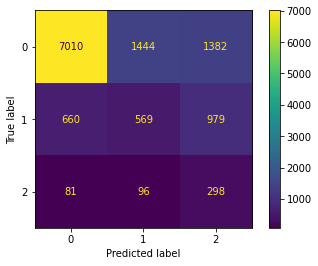

,Metrics,Train Score,Test Score
0,precision score,0.763296,0.762410
1,recall score,0.628637,0.629204
2,f1 score,0.679241,0.680042
3,roc_auc score,0.775561,0.779027


In [ ]:
# Training and collecting the results of the classifier with best params.
best_lr=LogisticRegression(class_weight='balanced',C=100)
best_lr_results=model_results(best_lr,X_train,y_train,X_test,y_test)
best_lr_results

**Inference** : 

*   After HyperParameter Tuning also,the training and test scores don't differ much which is a good sign and results don't change much.
*   It gives score of precison as 0.762 and roc_auc as 0.779 but recall score is low which is 0.629 and thus f1 score is also low which is 0.68.
*   It is able to correctly classify 7010 points out of 9836 of class 1.
*   It is able to correctly classify 298 points out of 475 of class 2, but it still classified only 569 points out of 2208.





### **Naive Baye's Classifier**

**Note** : 
*   To handle class imbalancy in NB we will simply ignore the class prior probabilities , and to that we will use ComplementNB instead of Gaussian NB.  
*   The Complement NB assumes that numerical fatures comes from Multinomial Distribution that means these features can't contain negative values, so to keep this in mind we will normalize the data using MinMaxScaler instead of using standardization (using Power Transformer).
*   To remove skewness from numerical features we will use cuberoot transformation before normalization , as we have seen in EDA above that cuberoot transformation remove skewness well.

In [ ]:
# Defining MinMaxScaler.
scaler=MinMaxScaler()

## Removing skewness from numerical features using Cube Root Transformation.
train_numerical_cbrt=np.cbrt(train_set[numerical_features])
test_numerical_cbrt=np.cbrt(test_set[numerical_features])
## Fitting the scaler with numerical features in train set.
scaler.fit(train_numerical_cbrt)
## Transforming numerical features in train set.
train_numerical_2=scaler.transform(train_numerical_cbrt)
## Transforming numerical features in test set.
test_numerical_2=scaler.transform(test_numerical_cbrt)

# Concatecating the numerical and categorical features together.
X_train_2=np.concatenate([train_numerical_2,train_categorical],axis=1)
X_test_2=np.concatenate([test_numerical_2,test_categorical],axis=1)

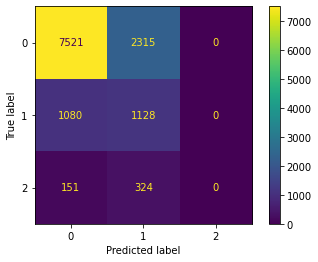

,Metrics,Train Score,Test Score
0,precision score,0.728663,0.727990
1,recall score,0.693620,0.690870
2,f1 score,0.704533,0.702395
3,roc_auc score,0.718995,0.714263


In [ ]:
# Naive Baye's.
from sklearn.naive_bayes import ComplementNB
nb=ComplementNB()
# Training and Collecting the results for the classifier.
results=model_results(nb,X_train_2,y_train,X_test_2,y_test)
results

**Inference** : 
*   The training and test scores for Naive Bayes don't differ much so the model is not overfitting or underfitting.
*   The Naive Bayes gives test score of precison as 0.727 and roc_auc as 0.714 ,recall score as 0.69, and f1 score as 0.71.
*   It is able to correctly classify 7521 points out of 9836 of class 0.
*   It is able to correctly classify 1128 points out of 2208 of class 1 which is a great job done , but no points of class 2 have been classified which is not a good sign.

In [ ]:
# Hyper parameter tuning.
nb=ComplementNB()
parameters={'alpha':[1e-09,1e-08,1e-06,1e-04,1e-02,0.1,1,10]}
# Collecting best params for the classifier.
best_params=model_best_params(nb,parameters,X_train_2,y_train)
print(best_params)

{'alpha': 1e-09}


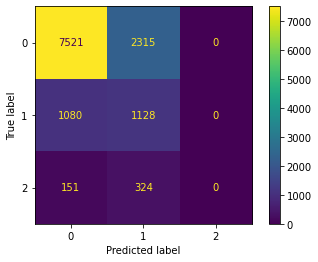

,Metrics,Train Score,Test Score
0,precision score,0.728663,0.727990
1,recall score,0.693620,0.690870
2,f1 score,0.704533,0.702395
3,roc_auc score,0.718973,0.714219


In [ ]:
# Training and collecting the results of the classifier with best params.
best_nb=ComplementNB(alpha=1e-09)
results=model_results(best_nb,X_train_2,y_train,X_test_2,y_test)
results

**Inference** : 
*   After hyperparameter tuning also , the results are pretty much similar and strangely no points of class 2 have been classifed which is not a sign of good modelling as it completely ignoring minority class for classification.

### **Decision Tree Classifier**

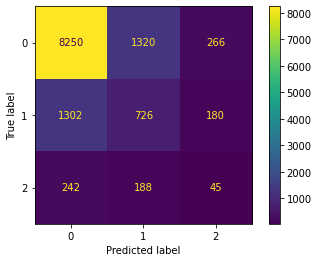

,Metrics,Train Score,Test Score
0,precision score,0.999721,0.722619
1,recall score,0.999720,0.720585
2,f1 score,0.999720,0.721596
3,roc_auc score,1.000000,0.620628


In [ ]:
# Decision Tree.
dt=DecisionTreeClassifier(class_weight='balanced')
# Training and Collecting the results for the classifier.
results=model_results(dt,X_train,y_train,X_test,y_test)
results

**Inference** : 
*   The difference between training and test scores of Decision Tree are very large . The model gives very high scores for train set but not for test set , so it is clearly overfitting.
*   The Decision Tree gives test score of precison as 0.723 and roc_auc as 0.622 ,recall score as 0.721, and f1 score as 0.722.
*   It is able to correctly classify 8260 points out of 9836 of class 0.
*   It is able to correctly classify 725 points out of 2208 of class 1 and only 49 points out of 475 of class 2.

In [ ]:
# Hyper parameter tuning.
dt=DecisionTreeClassifier(class_weight='balanced')
parameters={'max_depth':[5,10,50,100],'min_samples_split':[5,10,100,500]}
# Collecting best params for the classifier.
best_params=model_best_params(dt,parameters,X_train,y_train)
print(best_params)

{'max_depth': 50, 'min_samples_split': 5}


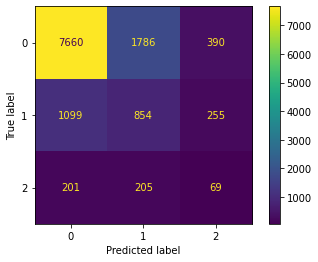

,Metrics,Train Score,Test Score
0,precision score,0.943312,0.728300
1,recall score,0.924074,0.685598
2,f1 score,0.928259,0.704407
3,roc_auc score,0.989250,0.646756


In [ ]:
# Training and collecting the results of the classifier with best params.
best_dt=DecisionTreeClassifier(max_depth=100,min_samples_split=5,class_weight='balanced')
best_dt_results=model_results(best_dt,X_train,y_train,X_test,y_test)
best_dt_results

**Inference** : 
*   After hyperparameter tuning also ,the difference between training and test scores of Decision Tree are still very large . The model gives very high scores for train set but not for test set , so it is clearly overfitting.
*   The Decision Tree gives test score of precison as 0.727 and roc_auc as 0.646 ,recall score as 0.684, and f1 score as 0.703.
*   It is able to correctly classify 7664 points out of 9836 of class 0.
*   It is able to correctly classify 846 points out of 2208 of class 1 and only 63 points out of 475 of class 2.

### **Random Forest**

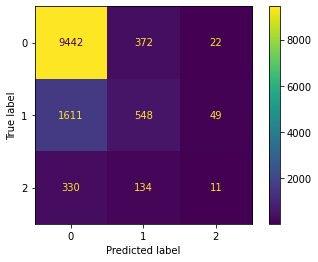

,Metrics,Train Score,Test Score
0,precision score,0.999661,0.748502
1,recall score,0.999661,0.798866
2,f1 score,0.999661,0.759984
3,roc_auc score,0.999980,0.777642


In [ ]:
# Random Forest.
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
# Training and Collecting the results for the classifier.
results=model_results(rf,X_train,y_train,X_test,y_test)
results

**Inference** : 
*   The difference between training and test scores of Random Forest is very large. The model gives very high scores for train set but not for test set , so it is clearly overfitting.
*   The Random Forest gives test score of precison as 0.747 and roc_auc as 0.777 ,recall score as 0.798, and f1 score as 0.758.
*   It is correctly classifying 9450 points out of 9836 of class 0 which is great job done.
*   It is correctly classifying 531 points out of 2208 of class 1 and only 13 points out of 475 of class 2.

In [ ]:
# Hyper parameter tuning.
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators':[10,100,200,500],'min_samples_split': [2,10,100,500]}
# Collecting best params for the classifier.
best_params=model_best_params(rf,parameters,X_train,y_train)
print(best_params)

{'min_samples_split': 2, 'n_estimators': 500}


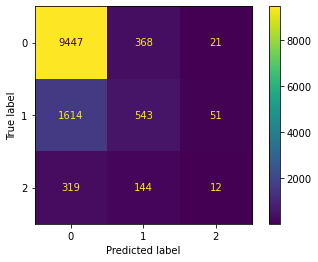

,Metrics,Train Score,Test Score
0,precision score,0.999721,0.748427
1,recall score,0.999720,0.798946
2,f1 score,0.999720,0.760025
3,roc_auc score,0.999993,0.781079


In [ ]:
# Training and collecting the results of the classifier with best params.
best_rf=RandomForestClassifier(n_estimators=500,min_samples_split=2,class_weight='balanced',n_jobs=-1)
results=model_results(best_rf,X_train,y_train,X_test,y_test)
results

**Inference** : 
*   After Hyperparameter tuning also, the difference between training and test scores of Random Forest are very large. The model gives very high scores for train set but not for test set , so it is clearly overfitting.
*   There is not much difference in test scores.

### **XGBoost**

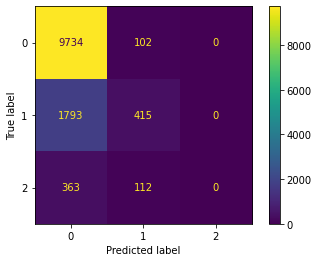

,Metrics,Train Score,Test Score
0,precision score,0.760951,0.759584
1,recall score,0.812122,0.810688
2,f1 score,0.757798,0.755629
3,roc_auc score,0.809085,0.813096


In [ ]:
# XGBoost.
xgb=XGBClassifier(class_weight='balanced')
# Training and Collecting the results for the classifier.
results=model_results(xgb,X_train,y_train,X_test,y_test)
results

**Inference** : 
*   The training and test scores for XGBoost don't differ much so the model is not overfitting or underfitting.
*   The XGBoost gives test score of precison as 0.759 and roc_auc as 0.813 ,recall score as 0.810, and f1 score as 0.755.
*   It is able to correctly classify 9734 points out of 9836 of class 0 which is a great job done.
*   It is able to correctly classify 415 points out of 2208 of class 1, but no points of class 2 have been classified which is not a good sign.

In [ ]:
# Hyper parameter tuning.
xgb=XGBClassifier(class_weight='balanced')
parameters={'n_estimators':[10,100,200,500],'learning_rate':[0.001,0.01,0.1,0.5]}
# Collecting best params for the classifier.
best_params=model_best_params(xgb,parameters,X_train,y_train)
print(best_params)

{'learning_rate': 0.1, 'n_estimators': 500}


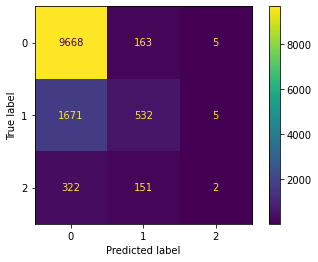

,Metrics,Train Score,Test Score
0,precision score,0.797104,0.768637
1,recall score,0.819231,0.814921
2,f1 score,0.775148,0.768463
3,roc_auc score,0.828635,0.819543


In [ ]:
# Training and collecting the results of the classifier with best params.
best_xgb=XGBClassifier(n_estimators=500,learning_rate=0.1,class_weight='balanced')
results=model_results(best_xgb,X_train,y_train,X_test,y_test)
results

**Inference** : 
*   After hypermeter tuning also, the training and test scores for XGBoost don't differ much so the model is not overfitting or underfitting.
*   The XGBoost gives test score of precison as 0.768 and roc_auc as 0.819 ,recall score as 0.814, and f1 score as 0.768.
*   It is able to correctly classify 9668 points out of 9836 of class 0 which is a great job done.
*   It is able to correctly classify 532 points out of 2208 of class 1, but only 2 points of class 2 have been classified which is not a good sign.

### **Model Performance Comparisons**

In [ ]:
# Using PrettyTable for better Visualization.
from prettytable import PrettyTable,ALL
table=PrettyTable(['Model (tuned)','Train Precision','Test Precision','Train Recall','Test Recall','Train F1','Test F1','Train ROC_AUC','Test ROC_AUC'])
table.hrules=ALL
table.add_row(['Logitic Regression','0.763','0.762','0.628','0.628','0.679','0.679','0.775','0.779'])
table.add_row(['Naive Bayes Classifier','0.728','0.727','0.693','0.690','0.704','0.702','0.718','0.714'])
table.add_row(['Decision Tree Classifier','0.943','0.727','0.923','0.684','0.928','0.703','0.989','0.646'])
table.add_row(['Random Forest Classifier','0.999','0.749','0.999','0.799','0.999','0.760','0.999','0.782'])
table.add_row(['XGBoost Classifier','0.797','0.768','0.819','0.814','0.775','0.768','0.828','0.819'])
print(table)

+--------------------------+-----------------+----------------+--------------+-------------+----------+---------+---------------+--------------+
|      Model (tuned)       | Train Precision | Test Precision | Train Recall | Test Recall | Train F1 | Test F1 | Train ROC_AUC | Test ROC_AUC |
+--------------------------+-----------------+----------------+--------------+-------------+----------+---------+---------------+--------------+
|    Logitic Regression    |      0.763      |     0.762      |    0.628     |    0.628    |  0.679   |  0.679  |     0.775     |    0.779     |
+--------------------------+-----------------+----------------+--------------+-------------+----------+---------+---------------+--------------+
|  Naive Bayes Classifier  |      0.728      |     0.727      |    0.693     |    0.690    |  0.704   |  0.702  |     0.718     |    0.714     |
+--------------------------+-----------------+----------------+--------------+-------------+----------+---------+---------------+-

## **Summary**


*   The objective is to create a machine learning model to characterize the mail that is ignored ; read ; acknowledged by the reader.
*   There are total 12 features out of which the feature "Email_Status " is a response variable and rest are predictor variables.
*   The features "Customer_Location", "Total_Past_Communications", "Total_Links" and "Total_Images" have missing values. We need to take care of these missing values.
*   There are no duplicate rows in the dataset.
*   There is high imbalance in class distribution of response variable. The majority of the data, 54941 data points which is 80.38 % belongs to "class 0", 11039 points which is 16.15 % belongs to class "1" and very small amount of data, 2373 data points which is 3.47% belongs to "class 2".
*    The features "Email_Type", "Email_Source_Type", "Email_Campaign_Type" and "Time_Email_sent_Category" contains categorical information , so we have changed the datatype according to that.
*   There were five categorical and numerical features each afterwards.
*   The numerical features 'Subject_Hotness_Score','Total_Links' and  'Total_Images' were postively skewed.
*   The Log, Square Root and Cube Root transformations used for removing skewness and these were able to remove the skewness , but Power transformation removed skewness outstandigly and also it standardize the data as well.
*   All the numerical features except 'Word_Count' had outliers.
*   The numerical features "Total_Images" and "Total_Links" were highly correlated with correlation value as 0.78.
*   There are two subcategories under "Email_Type" and "Email_Source_Type" features, three subcategories under "Email_Campaign_Type" and "Time_Email_Sent_Category" features, and seven subcategories under "Customer_Location" feature.
*   For the feature "Email_Type" ,there are more number of points of Type 1 rather than Type 2 .For "Email_Source_Type",there is slight difference in ditribution of points of Type 1 and Type 2. For "Customer_Location", majority of the points belongs to category G. For "Email_Campaign_Type" , majority of the points belongs to Type 2. For the "Time_Email_Sent_Category" also, majority of the points belongs to Type 2.
*   The distribution of Email_Status is similar in all categorical features except "Email_campaign_Type".There are more number of points related to majority class in each feature.For "Email_campaign_Type" as Type 1 ,the distribution of points w.r.t to classes can be seen similar, as there are very less number of points for the same.
*  The "Email_Id" feature contains identity information. So dropping this feature.
*  As there is high class imbalancy and we have very few points of class "2" and class "1" , so we have removed only those outliers which belongs to class "1".
*   We have used Iterative Imputer to fill missing values of numerical features and treating missing values of categorical feature as seperate category using Simple Imputer.
*   To remove collinearity combination of collinear features as a single feature have been taken.
*   We have used Power Transformer for transforming numerical features as it helps in removing the skewness and standardizing as well and One hot Encoder for Categorical Features.
*   The shape of Train Set becomes - (50075, 22) and Test Set Shape becomes =(12519, 22)
*   There is high class imbalancy in the dataset. To solve this we will provide different weights to both the majority and minority classes. The difference in weights will influence the classification of the classes during the training phase. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class. The weights can be assigned accoding to classes simply by using parameter "class_weight" as "balanced" while defining the machine learning models.
*   There is high imbalance of classes in the dataset, and also our objective is to classify the mails as ignored ; read and acknowledged as correctly as possible to corresponding classes.So fo this task we will look upon weighted Precison,Recall and F1 score, as Precision and Recall account for true positives which is nothing but correctly classified points belonging to respective classes and F1 score is just hamonic mean of these two which is a combined single metric to look for. We wil also look for ROC_AUC score.
*   The objective is to classify the mails as ignored ; read and acknowledged. For this , we need to find the reasons why the mails being ignored , how many being read and finally how many being acknowledged.So wee need a model which an explain the reasons fo classifications , so that we can improve the content for the mails such that mails could get read and acknowledged in the future which helps the owners stay connected with their prospective customers. The feature importance is also very important in this case as we need to know which are the most important features for classification, so we can focus on those to improve the content for mails.
*  The training and test scores don't differ much for tuned Logistic Regression which is a good sign.
It gives score of precison as 0.762 and roc_auc as 0.779 but recall score is low which is 0.629 and thus f1 score is also low which is 0.68.
It is able to correctly classify 7010 points out of 9836 of class 1.
It is able to correctly classify 298 points out of 475 of class 2, but it still classified only 569 points out of 2208.
* The training and test scores for tuned Naive Bayes don't differ much so the model is not overfitting or underfitting.
The Naive Bayes gives test score of precison as 0.727 and roc_auc as 0.714 ,recall score as 0.69, and f1 score as 0.71.
It is able to correctly classify 7521 points out of 9836 of class 0.
It is able to correctly classify 1128 points out of 2208 of class 1 which is a great job done , but no points of class 2 have been classified which is not a good sign. 
* The difference between training and test scores of tuned Decision Tree are very large . The model gives very high scores for train set but not for test set , so it is clearly overfitting.
The Decision Tree gives test score of precison as 0.727 and roc_auc as 0.646 ,recall score as 0.684, and f1 score as 0.703.
It is able to correctly classify 7664 points out of 9836 of class 0.
It is able to correctly classify 846 points out of 2208 of class 1 and only 63 points out of 475 of class 2.
* The difference between training and test scores of tuned Random Forest are very large. The model gives very high scores for train set but not for test set , so it is clearly overfitting.
The Random Forest gives test score of precison as 0.747 and roc_auc as 0.777 ,recall score as 0.798, and f1 score as 0.758.
It is able to correctly classify 9450 points out of 9836 of class 0 which is great job done.
It is able to correctly classify 531 points out of 2208 of class 1 and only 13 points out of 475 of class 2.
*  The training and test scores for XGBoost don't differ much so the model is not overfitting or underfitting.
The XGBoost gives test score of precison as 0.768 and roc_auc as 0.819 ,recall score as 0.814, and f1 score as 0.768.
It is able to correctly classify 9668 points out of 9836 of class 0 which is a great job done.
It is able to correctly classify 532 points out of 2208 of class 1, but only 2 points of class 2 have been classified which is not a good sign.


## **Conclusions**



*   The final model selected is Logistic Regression.
*   Taking Scores into consideration, XGBoost outperforms all models , but it hardly classify 1 or 2 points corectly from the minority class. At other hand Logistic Regression being simplest model able to correctly classify most number of points from minority class other than any model. Also Logistic Regression is very easy to interpret , as it fits a hyperplane for a classification.


## **Challenges Faced**



*   The dataset contains missing values.
*   The dataset contains outliers.
*   Some of the features mapped to wrong datatype.
*   The dataset cotains correlated features also.

